In [161]:
#Inspired by https://www.kaggle.com/fahd09/eda-of-crime-in-chicago-2005-2016
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import plotly.plotly as py

In [162]:
shooting_data=pd.read_csv("Rochester_Shooting_Victims.csv")
homicide_data =pd.read_csv("RochesterNY_Homicides.csv")
all_crime_data=pd.read_csv("RPD__Part_I_Crime_2011_to_Present.csv")

In [163]:
all_crime_data.head(5)

,X,Y,OBJECTID,Geocode_Address,Geocode_Street,Case_Number,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredFrom_Timestamp,...,Statute_Text,Statute_Description,Statute_CrimeCategory,Statute_Attempted,Weapon_Description,Larceny_Type,Location_Type,Geo_Beat,Geo_Section,Geo_Section_Num
0,NaN,NaN,1,NaN,* Address Not Specified *,2014-00152336,2014,6,30,2014-06-16T00:30:00.000Z,...,Burglary,Burglary 3rd: Illegal Entry with Intent to Com...,5,Completed,* No Weapon Specified *,* No Larceny Type Specified *,Garage/Shed,NaN,NaN,NaN
1,NaN,NaN,2,NaN,* Address Not Specified *,2017-00158432,2017,6,1200,2017-06-17T12:00:00.000Z,...,Larceny,Grand Larceny 4th: Firearms/Rifles/Shotguns ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Parking Lot,NaN,NaN,NaN
2,NaN,NaN,3,NaN,* Address Not Specified *,2018-00057329,2018,2,800,2018-02-14T08:00:00.000Z,...,Larceny,Grand Larceny 4th: Firearms/Rifles/Shotguns ...,6,Completed,* No Weapon Specified *,All Other Larcenies,Unknown,NaN,NaN,NaN
3,NaN,NaN,4,NaN,* Address Not Specified *,2018-00052551,2018,2,1200,2018-02-27T12:00:00.000Z,...,Larceny,Grand Larceny 3rd: Property Value Exceeds $300...,6,Completed,* No Weapon Specified *,All Other Larcenies,Other Commercial Service Location,NaN,NaN,NaN
4,NaN,NaN,5,NaN,* Address Not Specified *,2018-00044870,2018,2,1830,2018-02-26T18:30:00.000Z,...,Robbery,Robbery 3rd ...,3,Completed,Personal Weapons,* No Larceny Type Specified *,Street,NaN,NaN,NaN


In [164]:
shooting_data.head(5)

,X,Y,ObjectID,ID,Case_Number,Address,Occurred_Date,Occurred_Month,Occurred_Year,Crime_Type,Multiple_Shooting,Gender,Race,Ethnicity,Victim_Age,Victim_Age_Band,Zipcode
0,-77.585467,43.162928,1,b495a5eb9b56d2052eeab6a5e52ecf75,16-295732,"18 FOURTH ST, ROCHESTER, NY, 14609",2016-11-19T01:00:00.000Z,11,2016,SHOOTING,NO,MALE,BLACK,NON HISPANIC,22,15-24,14609
1,-77.629118,43.143226,2,424f1e5dca93ada794bba3499d214abb,16-290863,"581 JEFFERSON AVE, ROCHESTER, NY, 14611",2016-11-13T01:00:00.000Z,11,2016,HOMICIDE,YES,MALE,BLACK,NON HISPANIC,32,25-44,14611
2,-77.629118,43.143226,3,fb552242be5e23f6b7c95b7ed7f4d98a,16-290863,"581 JEFFERSON AVE, ROCHESTER, NY, 14611",2016-11-13T01:00:00.000Z,11,2016,SHOOTING,YES,MALE,BLACK,NON HISPANIC,45,45-OLDER,14611
3,-77.596957,43.185086,4,9066f3877cebf83ad87f3a5fc6cb5e5c,16-288632,"85 KOSCIUSKO ST, ROCHESTER, NY, 14621",2016-11-09T12:00:00.000Z,11,2016,SHOOTING,NO,MALE,BLACK,NON HISPANIC,34,25-44,14621
4,-77.647313,43.139793,5,24e4944d3c42553f5c05ea272cc68477,16-282715,"398 ABERDEEN ST, ROCHESTER, NY, 14619",2016-11-02T22:00:00.000Z,10,2016,SHOOTING,NO,MALE,WHITE,HISPANIC,22,15-24,14619


In [165]:
homicide_data.pdOccurredDate=pd.to_datetime(homicide_data.OccurredDate)

/Users/Jason/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [166]:
homicide_data.pdOccurredDate.head(3)

0   2000-01-13 05:00:00
1   2000-01-22 05:00:00
2   2000-01-25 05:00:00
Name: OccurredDate, dtype: datetime64[ns]

In [167]:
shooting_data.pdOccurredDate=pd.to_datetime(shooting_data.Occurred_Date)

/Users/Jason/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [168]:
shooting_data.pdOccurredDate.head(3)

0   2016-11-19 01:00:00
1   2016-11-13 01:00:00
2   2016-11-13 01:00:00
Name: Occurred_Date, dtype: datetime64[ns]

In [169]:
all_crime_data.pdOccurredFrom_time=pd.to_datetime(all_crime_data.OccurredFrom_Timestamp)

/Users/Jason/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [170]:
all_crime_data.pdOccurredFrom_time.head(3)

0   2014-06-16 00:30:00
1   2017-06-17 12:00:00
2   2018-02-14 08:00:00
Name: OccurredFrom_Timestamp, dtype: datetime64[ns]

In [171]:
all_crime_data.OBJECTID.head(3)

0    1
1    2
2    3
Name: OBJECTID, dtype: int64

In [172]:
all_crime_data.shape

(78268, 40)

In [173]:
all_crime_data.index=pd.DatetimeIndex(all_crime_data.pdOccurredFrom_time)

In [174]:
shooting_data.index=pd.DatetimeIndex(shooting_data.pdOccurredDate)

In [175]:
homicide_data.index=pd.DatetimeIndex(homicide_data.pdOccurredDate)

Text(0,0.5,u'Number of crimes')

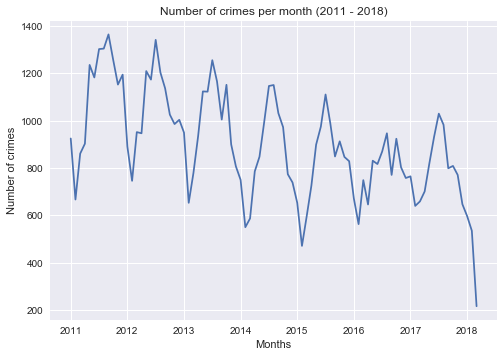

In [176]:
all_crime_data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2011 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

Text(0,0.5,u'Number of homicide')

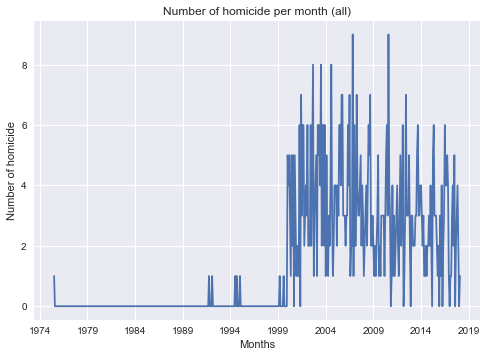

In [177]:
homicide_data.resample('M').size().plot(legend=False)
plt.title('Number of homicide per month (all)')
plt.xlabel('Months')
plt.ylabel('Number of homicide')

In [178]:
# It appears the data before 2000 may not be complete. Filter the data to only include reports after 2000

In [179]:
homicide_data_2000onwards=homicide_data[homicide_data['OccurredYear']>=2000]

Text(0,0.5,u'Number of homicide')

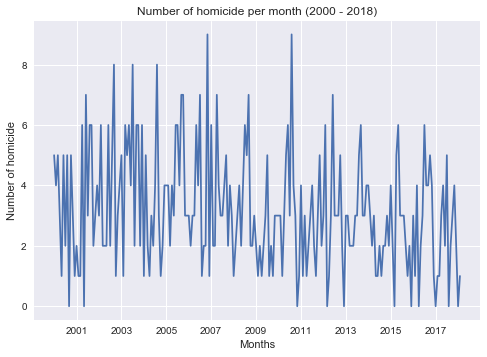

In [180]:
homicide_data_2000onwards.resample('M').size().plot(legend=False)
plt.title('Number of homicide per month (2000 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of homicide')

Text(0,0.5,u'Number of shootings')

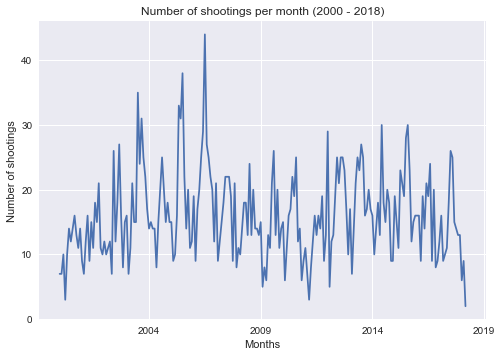

In [181]:
shooting_data.resample('M').size().plot(legend=False)
plt.title('Number of shootings per month (2000 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of shootings')

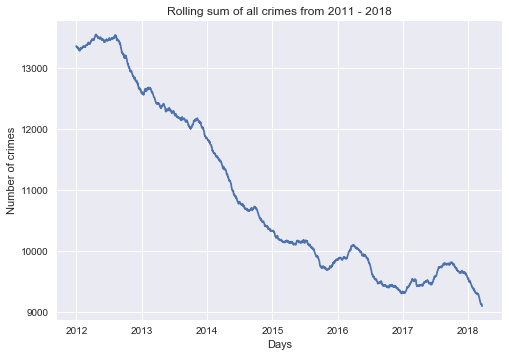

In [182]:
#The idea is, for each day, we calculate the sum of crimes of the past year. 
#If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year.
#On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.plt.show()
all_crime_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2011 - 2018')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

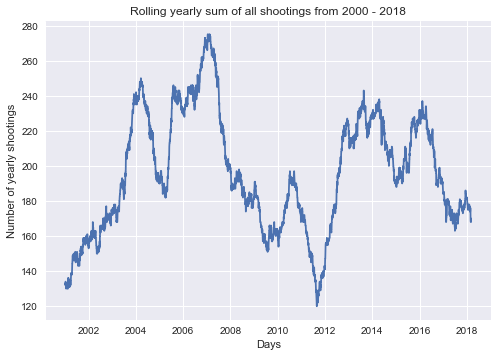

In [183]:
shooting_data.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all shootings from 2000 - 2018')
plt.ylabel('Number of yearly shootings')
plt.xlabel('Days')
plt.show()

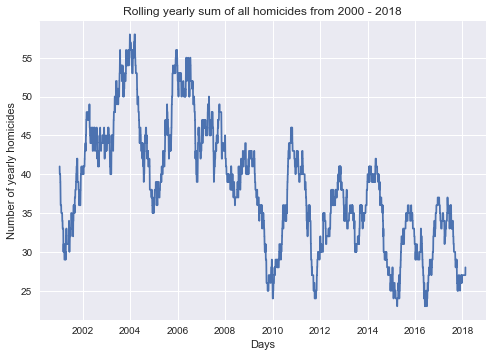

In [184]:
homicide_data_2000onwards.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling yearly sum of all homicides from 2000 - 2018')
plt.ylabel('Number of yearly homicides')
plt.xlabel('Days')
plt.show()

In [185]:
crimes_count_date = all_crime_data.pivot_table('OBJECTID', aggfunc=np.size, columns='Statute_Text', index=all_crime_data.index.date, fill_value=0)

In [186]:
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

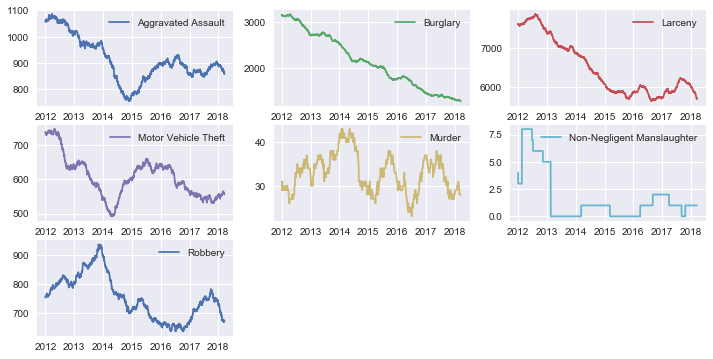

In [187]:
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 6), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

#looks like  Aggravated assault and Motor Vehicle theft dropped around 2013-2014 but bounced back a bit since then;
#Robbery on the other hind peaked around 2013-2014
#Burglary and Larceny droped throughout the years. Murder rate has been quite consistent throught the years.

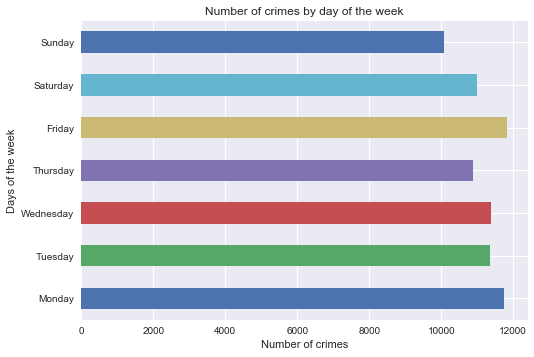

In [188]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
all_crime_data.groupby([all_crime_data.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

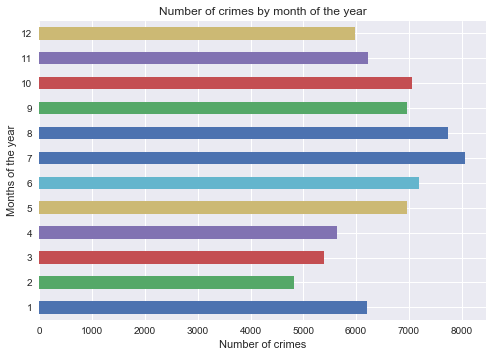

In [189]:
all_crime_data.groupby([all_crime_data.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

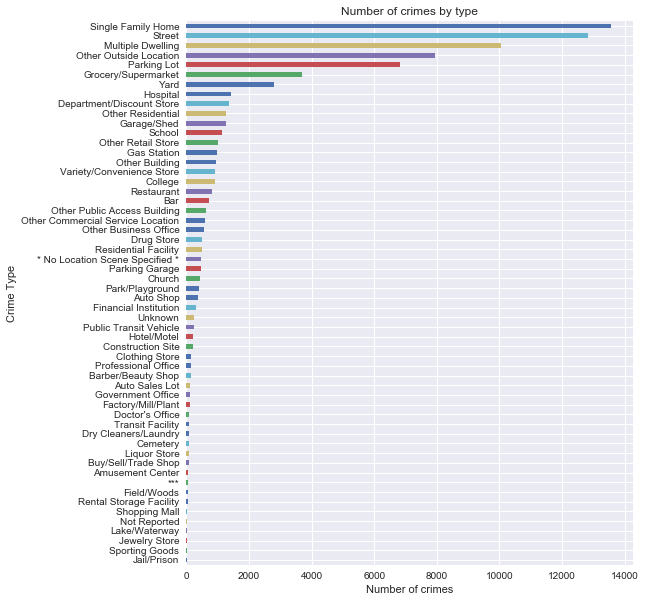

In [190]:
plt.figure(figsize=(8,10))
all_crime_data.groupby([all_crime_data['Location_Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [191]:
#Not all crimes are the same. Some crimes types are more likely to occur than other types depending on the place and time. 

In [192]:
#After seeing the base rates of each crime location and type, 
#we will now assume that all crime types (and locations) have the same frequency or, 
#in other words, they are all equal overall. 
#We are interested in detecting how a specific crime type is different across all days of the week or hours of the day.

In [193]:
#Is theft or burglary is more likely to occur at a weekday compared to a weekend? 
#Are they more likely to happen in the morning vs evening or late night ? 
#Are they more likely to occur in a street vs a bar?

In [194]:
hour_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)

In [195]:
hour_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)
hour_by_type     = all_crime_data.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crime_data.index.hour, aggfunc=np.size).fillna(0)

In [196]:
dayofweek_by_location = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns=all_crime_data.index.dayofweek, aggfunc=np.size).fillna(0)
dayofweek_by_type = all_crime_data.pivot_table(values='OBJECTID', index='Statute_Text', columns=all_crime_data.index.dayofweek, aggfunc=np.size).fillna(0)
location_by_type  = all_crime_data.pivot_table(values='OBJECTID', index='Location_Type', columns='Statute_Text', aggfunc=np.size).fillna(0)

In [197]:
from sklearn.cluster import AgglomerativeClustering as AC

In [198]:
def scale_df(df,axis=0):
    '''
    A utility function to scale numerical values (z-scale) to have a mean of zero
    and a unit variance.
    '''
    return (df - df.mean(axis=axis)) / df.std(axis=axis)

In [199]:
def plot_hmap(df, ix=None, cmap='bwr'):
    '''
    A function to plot heatmaps that show temporal patterns
    '''
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()

In [200]:
def scale_and_plot(df, ix = None):
    '''
    A wrapper function to calculate the scaled values within each row of df and plot_hmap
    '''
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort() # a trick to make better heatmaps
    cap = np.min([np.max(df_marginal_scaled.as_matrix()), np.abs(np.min(df_marginal_scaled.as_matrix()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)
    
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

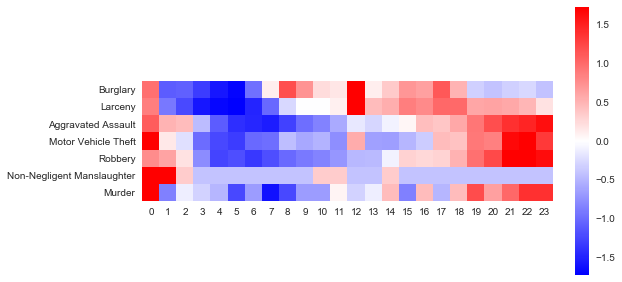

In [201]:
scale_and_plot(hour_by_type)

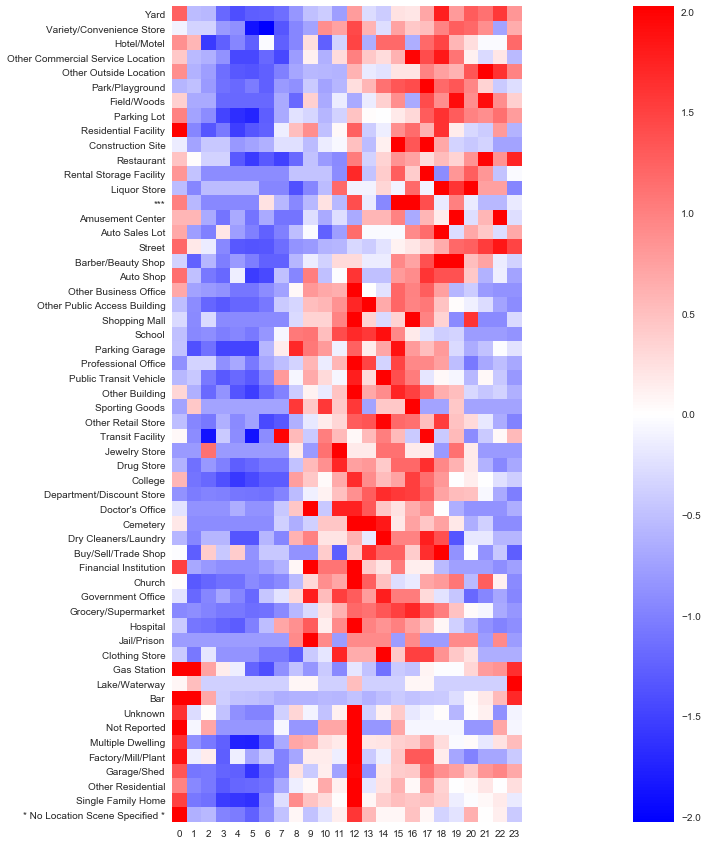

In [202]:
plt.figure(figsize=(40,15))
scale_and_plot(hour_by_location)

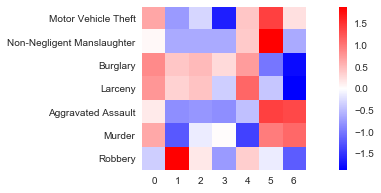

In [203]:
plt.figure(figsize=(12,3))
scale_and_plot(dayofweek_by_type)

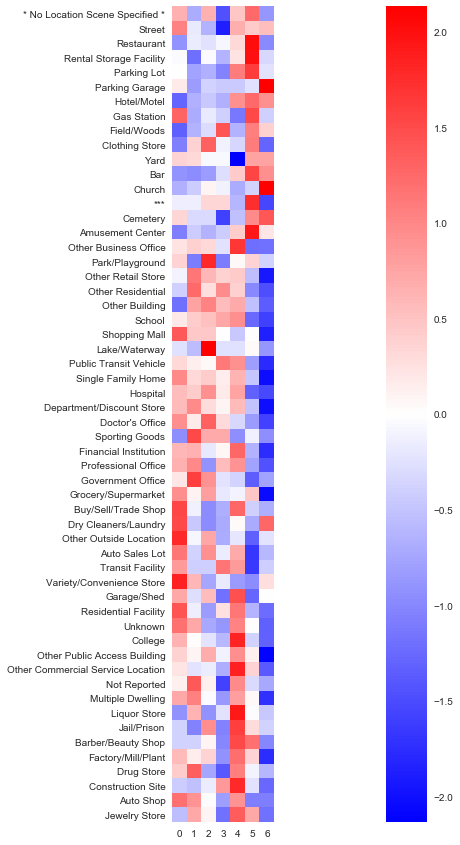

In [204]:
plt.figure(figsize=(40,15))
scale_and_plot(dayofweek_by_location)

In [205]:
#Where a certain crime type is most likely to happen?

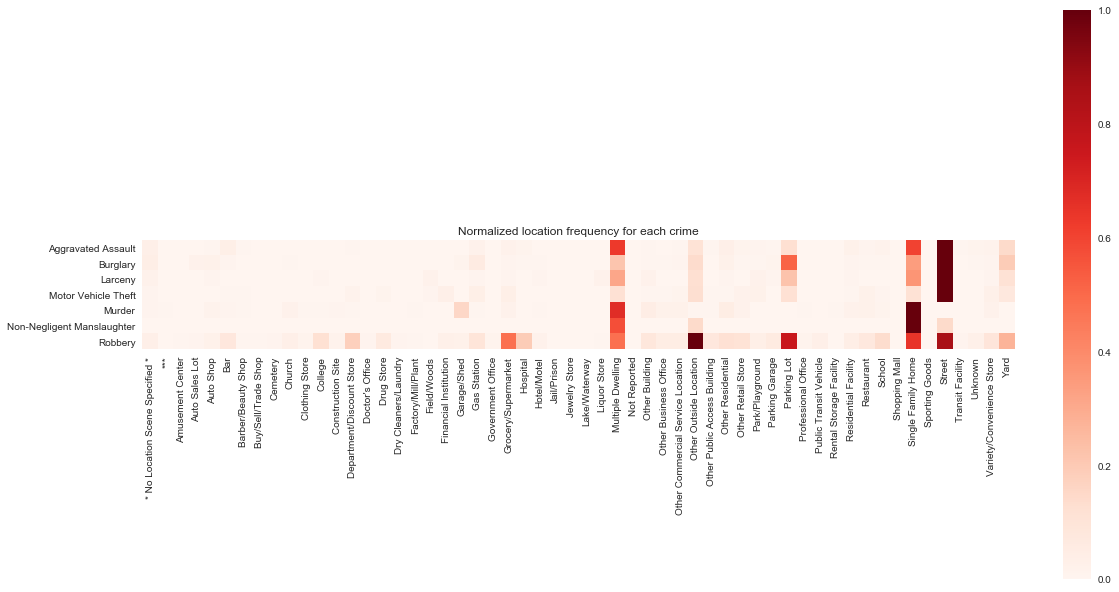

In [206]:
df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() # a trick to make better heatmaps
plt.figure(figsize=(17,13))
plt.imshow(df.T.iloc[ix,:], cmap='Reds')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

In [207]:
from pandas.tseries.holiday import *

In [208]:
cal=USFederalHolidayCalendar()

In [209]:
holidays = cal.holidays(start=all_crime_data.index.min(), end=all_crime_data.index.max())

In [210]:
all_crime_data['Holiday']=all_crime_data.index.isin(holidays)

In [211]:
all_crime_data[all_crime_data['Holiday']].describe()

,X,Y,OBJECTID,OccurredFrom_Date_Year,OccurredFrom_Date_Month,OccurredFrom_Time,OccurredThrough_Date_Year,OccurredThrough_Date_Month,OccurredThrough_Time,Reported_Date_Year,Reported_Date_Month,Reported_Time,Statute_Section,Statute_Degree,Statute_CrimeCategory,Geo_Beat,Geo_Section_Num
count,61.000000,61.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,61.000000,61.000000
mean,-77.609801,43.170506,39297.209677,2013.774194,6.064516,0.0,2013.919355,6.500000,679.548387,2013.935484,6.483871,1179.274194,149.995968,1.693548,5.612903,241.655738,4.442623
std,0.029058,0.025732,24528.360320,2.099331,4.032129,0.0,2.090559,3.638366,737.212732,2.118389,3.629307,540.624447,9.314431,1.542711,0.816928,28.551057,2.924178
min,-77.668056,43.124085,185.000000,2011.000000,1.000000,0.0,2011.000000,1.000000,0.000000,2011.000000,1.000000,0.000000,120.050000,0.000000,3.000000,201.000000,1.000000
25%,-77.632149,43.152478,15783.250000,2012.000000,1.000000,0.0,2012.000000,2.000000,0.000000,2012.000000,3.000000,927.750000,140.250000,0.000000,5.000000,219.000000,1.000000
50%,-77.608414,43.166678,40967.000000,2013.500000,7.000000,0.0,2014.000000,7.000000,475.500000,2014.000000,7.000000,1182.000000,155.250000,2.000000,6.000000,235.000000,5.000000
75%,-77.593385,43.180306,60978.250000,2015.000000,9.750000,0.0,2015.000000,9.000000,1386.250000,2015.000000,9.000000,1548.250000,155.287500,3.000000,6.000000,265.000000,7.000000
max,-77.542261,43.258942,77504.000000,2018.000000,12.000000,0.0,2018.000000,12.000000,2359.000000,2018.000000,12.000000,2134.000000,165.050000,4.000000,7.000000,297.000000,9.000000


In [212]:
from pandas import Series
from matplotlib import pyplot
from numpy import polyfit

In [213]:
daily_count=all_crime_data.resample('D').size()

In [214]:
X = daily_count.values

In [215]:
diff = list()
days_in_year = 365

In [216]:
for i in range(days_in_year, len(X)):
	month_str = str(daily_count.index[i].year-1)+'-'+str(daily_count.index[i].month)
	month_mean_last_year = daily_count[month_str].mean()
	value = X[i] - month_mean_last_year
	diff.append(value)

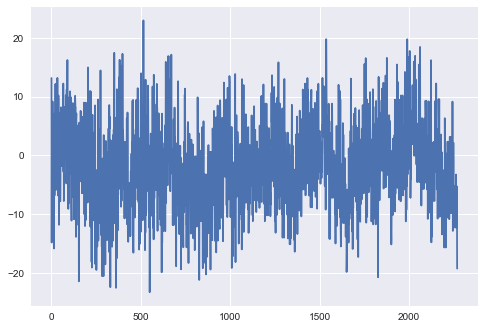

In [217]:
pyplot.plot(diff)
pyplot.show()
#seasonality adjusted daily crime data

In [218]:
hol_data=all_crime_data[all_crime_data['Holiday']]

In [219]:
daily_count_holiday=hol_data.resample('D').size()

In [220]:
X_holiday = daily_count_holiday.values

In [221]:
diff_holiday = list()
for i in range(days_in_year, len(X_holiday)):
	month_str = str(daily_count_holiday.index[i].year-1)+'-'+str(daily_count_holiday.index[i].month)
	month_mean_last_year = daily_count[month_str].mean()
	value = X_holiday[i] - month_mean_last_year
	diff_holiday.append(value)

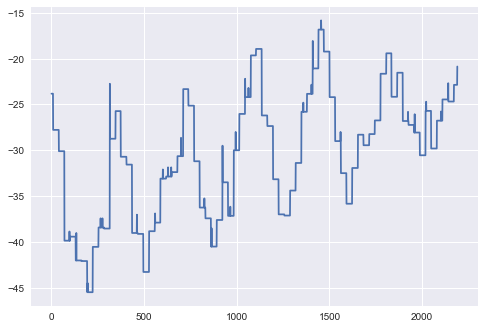

In [222]:
pyplot.plot(diff_holiday)
pyplot.show()
#seasonality adjusted holiday crime data

In [223]:
all_crime_data['OccurredFrom_Time']

OccurredFrom_Timestamp
2014-06-16 00:30:00      30
2017-06-17 12:00:00    1200
2018-02-14 08:00:00     800
2018-02-27 12:00:00    1200
2018-02-26 18:30:00    1830
2018-02-20 15:00:00    1500
2017-11-13 02:00:00     200
2017-09-24 23:22:00    2322
2018-02-06 09:41:00     941
2018-01-29 12:00:00    1200
2018-01-27 12:00:00    1200
2017-12-27 01:00:00     100
2017-12-23 01:20:00     120
2017-12-06 08:30:00     830
2016-11-04 15:51:00    1551
2016-11-06 11:27:00    1127
2017-09-11 18:00:00    1800
2017-09-09 12:00:00    1200
2017-08-29 09:47:00     947
2016-11-02 20:00:00    2000
2017-09-11 05:00:00     500
2017-07-23 14:50:00    1450
2017-09-08 12:00:00    1200
2017-08-25 17:00:00    1700
2016-07-07 08:00:00     800
2016-11-04 17:00:00    1700
2016-10-31 08:05:00     805
2016-11-05 15:20:00    1520
2017-09-06 09:11:00     911
2017-09-09 15:00:00    1500
                       ... 
2017-09-15 01:30:00     130
2012-10-20 21:38:00    2138
2012-06-17 02:30:00     230
2011-09-22 10:00:00    10

In [224]:
shift_time=[700,1500,2300]

In [225]:
all_crime_data2=all_crime_data

In [226]:
all_crime_data2['hour'] = [ts.hour for ts in all_crime_data2.index]

In [227]:
count_byhour= all_crime_data2.groupby(all_crime_data2.index.hour).count()['OBJECTID']

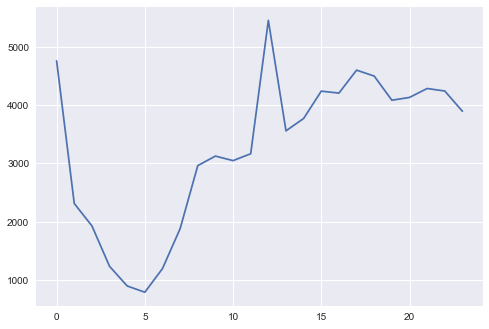

In [228]:
plt.plot(count_byhour)
#hourly crime number

In [229]:
all_crime_data2['Time'] = pd.to_datetime(all_crime_data2['OccurredFrom_Timestamp'])

In [230]:
all_crime_data2['TimeofDay']=pd.to_datetime(all_crime_data2['Time'], format='%H:%M').dt.time

In [231]:
count_bytimeofday= all_crime_data2.groupby(all_crime_data2.TimeofDay).count()['OBJECTID']

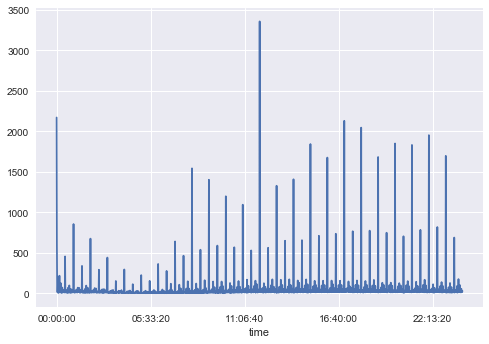

In [232]:
plt.plot(count_bytimeofday)
#exact time crime number

In [233]:
# No obvious crime number spike during shift changes at 7am, 3pm, 11pm